In [9]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Accuracy: 0.8894149065307113
Precision: 0.5127931769722814
Recall: 0.5144385026737968
Confusion Matrix:
[[6846  457]
 [ 454  481]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



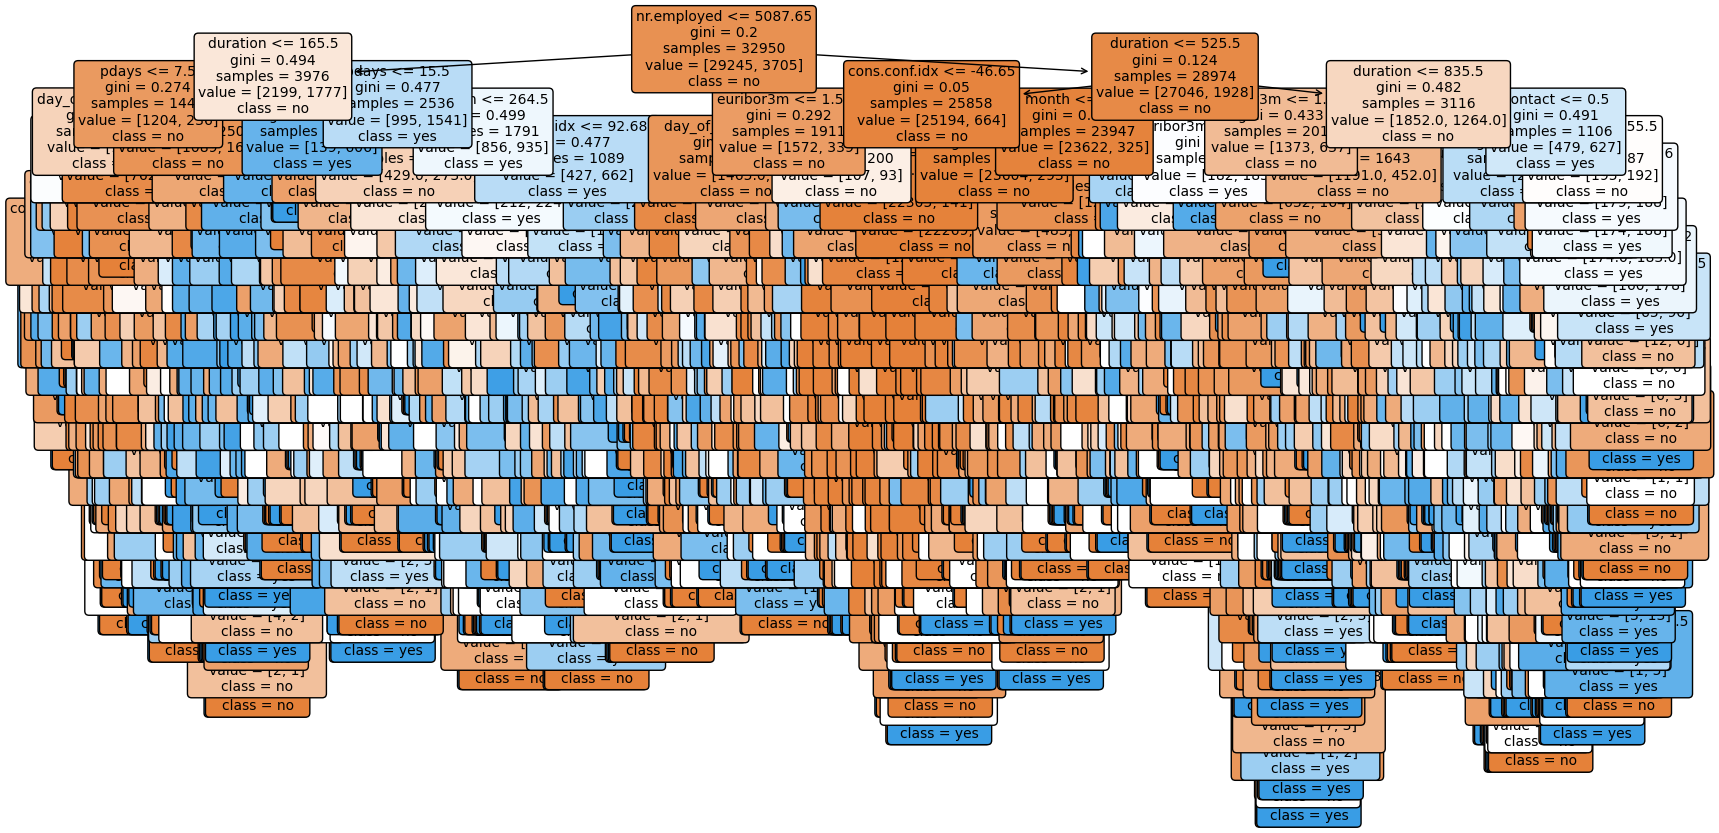

In [2]:
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

bank_full_zip_path = 'bank.zip'
bank_additional_zip_path = 'bank-additional.zip'

with zipfile.ZipFile(bank_full_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/mnt/data/bank_full')

with zipfile.ZipFile(bank_additional_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/mnt/data/bank_additional')

df_full = pd.read_csv('/mnt/data/bank_full/bank-full.csv', sep=';')
df_additional = pd.read_csv('/mnt/data/bank_additional/bank-additional/bank-additional-full.csv', sep=';')

df = df_additional

print(df.isnull().sum())

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['y'].classes_, filled=True, rounded=True, fontsize=10)
plt.savefig("decision_tree.png")
plt.show()
